## 3.1 (A) Running PLA starting from w=0, till it converges

### creating double semi circle data 

In [1]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

### Plotting the data 

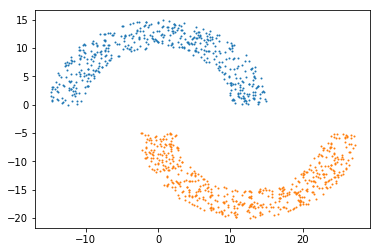

In [5]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### Schuffling data

In [3]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

### PLA and Final hypothesis

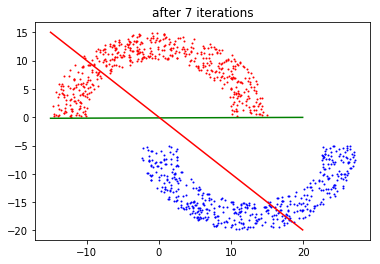

In [4]:
import random

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1


def Judge(x,w):
    flag = 1
    for i in x:
        if sign(i[:3].dot(w))*i[-1] < 0:
            flag = 0
            break
    return flag    

#number of iterations
s = 0
#initilizew=[0,0]
w=np.array([-1,0,-3],dtype = float)
while (Judge(data,w) == 0):
    i = data[random.randint(0,2*100-1)]
    if sign(i[:3].dot(w))*i[-1]<0:
        w += i[-1]*i[:3]
        s += 1

#w0+w1*x+w2*y=0
X3=np.arange(-15,20,0.1)
Y3=np.array([(X3[i]*w[1]+w[0])/(-w[2]) for i in range(len(X3))])

#target function is x+y=0
X4 = np.arange(-15,20,0.1)
Y4 = - X4

plt.scatter(X1,Y1,c = 'r',s = 1)
plt.scatter(X2,Y2,c = 'b',s = 1)
plt.plot(X3,Y3,'g')
plt.plot(X4,Y4,'r')
plt.title("after "+str(s)+" iterations")
#plt.legend()
plt.show()